In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pysm3
import pysm3.units as u
import healpy as hp
import warnings
warnings.filterwarnings("ignore")
h = 6.626e-34   #planck's constant: m^2/(kg*s)
c = 3.0e+8      #speed of light: m/s
k = 1.38e-23    #boltzmann constant: (m^2*kg)/(s^2*K)

In [2]:
#calculate the spectral radiance of a blackbody given a frequency and temperature
def planck(freq, T):
    num = (2*h*freq**3)/(c**2)
    e_term = (h*freq)/(k*T)
    den = np.exp(e_term) - 1
    return num/den

In [3]:
#convert from W/(sr*m^2*Hz) to J/sr
def convert_toJansky(intensity):
    return intensity*1e26

In [4]:
#takes intensity generated from planck function at a frequency and outputs correlated RJ temperature
def t_RJ(intensity, freq):
    return ((c**2)*intensity)/(2*k*freq**2)

In [5]:
#takes intensity and outputs a ratio of temperature in RJ units
def planck_d0ratio(freq1, freq2):
    convertedPlanck1 = t_RJ(planck(freq1,20), freq1)
    convertedPlanck2 = t_RJ(planck(freq2,20), freq2)
    x1 = freq1**(1.54)*convertedPlanck1
    x2 = freq2**(1.54)*convertedPlanck2
    return x2/x1  

In [6]:
planck_d0ratio(1.5e11,2e11)

1.4605634690822116

In [7]:
#visualization to check that ratio is right
def ratio_map_d0(freq1, freq2, ratio):
    sky = pysm3.Sky(nside=128, preset_strings=["d0"])
    map_freq1 = sky.get_emission(freq1 * u.GHz)
    map_freq2 = sky.get_emission(freq2 * u.GHz)
    map_ratio = map_freq2/map_freq1
    hp.mollview(map_ratio[0], min=ratio-0.01,max=ratio+0.01, title= "I map ratio d0", unit=map_freq1.unit)
    np.std(map_ratio[0])

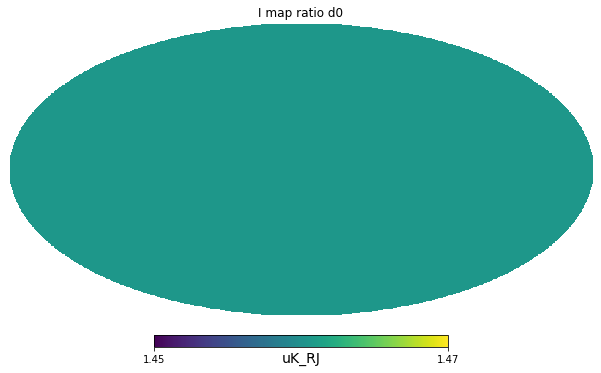

In [8]:
ratio_map_d0(150, 200, 1.46)

In [9]:
# log log plot based on temperature
logfreqs = np.arange(1, 3e13, 1e11)
freqs_beta = logfreqs**1.54
def log_plot(T):
    intensity = freqs_beta*planck(logfreqs, T)
    plt.plot(logfreqs, intensity, label= str(T)+'K') 
    plt.legend()
    plt.xscale('log')
    plt.xlim(1e14,1e10)
    plt.xlabel("Frequency")
    plt.yscale('log')
    plt.ylim(1,1e7)
    plt.ylabel("Spectral Radiance")
    plt.title("Spectral Radiance as a function of frequency (log-log plot)") 

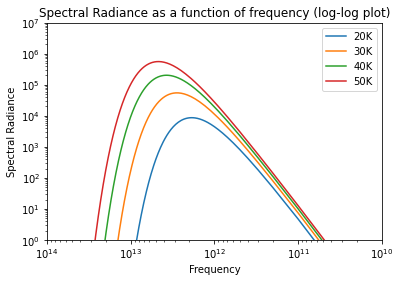

In [10]:
log_plot(20)
log_plot(30)
log_plot(40)
log_plot(50)

In [11]:
# linear plot based on temperature
freqs = np.arange(1, 3e13, 1e10)
freqs_beta = freqs**1.54
def lin_plot(T):
    intensity = freqs_beta*planck(freqs, T)
    plt.plot(freqs, intensity, label= str(T)+'K') 
    plt.legend()
    #plt.xlim(1e14,1e10)
    plt.xlabel("Frequency")
    #plt.ylim(1,1e7)
    plt.ylabel("Spectral Radiance")
    plt.title("Spectral Radiance as a function of frequency (log-log plot)") 

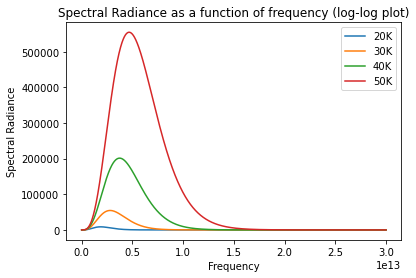

In [12]:
lin_plot(20)
lin_plot(30)
lin_plot(40)
lin_plot(50)